作者：AnishHui

GitHub: https://github.com/ugirc

# 一、单变量线性回归

案例：假设你是一家餐厅的CEO，正在考虑开一家分店，根据该城市的人口数据预测其利润

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "ex1data1.txt"
data = pd.read_csv(path, header=None, names=["Population", "Profit"])
data.head(10)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [3]:
data.tail()

,Population,Profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


对于二维数据（多维的你画不出来），可以先可视化数据，看下数据长什么样子

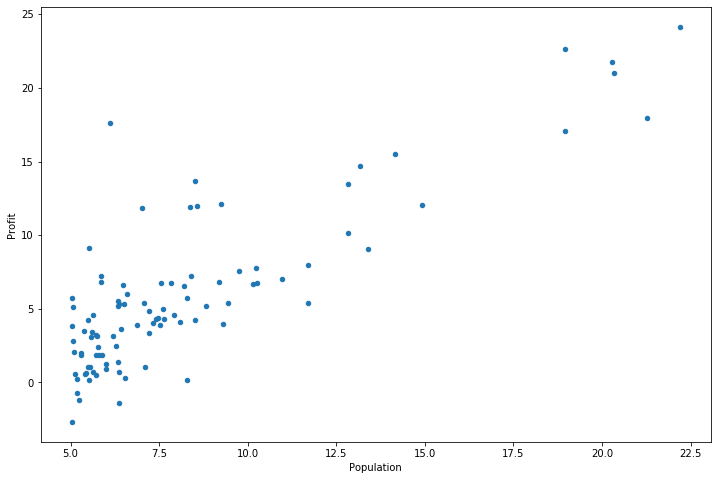

In [6]:
# x和y必须对应你data中的列标签
data.plot(kind="scatter", x="Population", y="Profit", figsize=(12,8))

# 或者
# fig, ax = plt.subplots(figsize=(12,8))
# ax.scatter(data.Population, data.Profit, label="Traning Data")

plt.show()

**求代价函数  $J(\theta)$**

首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [7]:
def costFunction(X, y, theta):
    inner = np.power(((X@theta) - y), 2)
    Cost = np.sum(inner) / (2 * len(X))
    return Cost

# X:(97,2) theta:(2,1) y:(97,1)

# 注意：在处理X，theta和y的时候他们的shape一定要正确

## 1. 数据处理

In [8]:
# insert(loc, column, value)
data.insert(0,'x0',1)

In [9]:
data.head()

,x0,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [10]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1]

dataframe形式的变量X的值
```
    x0  Population
0    1      6.1101
1    1      5.5277
2    1      8.5186
3    1      7.0032
4    1      5.8598
..  ..         ...
92   1      5.8707
93   1      5.3054
94   1      8.2934
95   1     13.3940
96   1      5.4369
```

### 1.1 pandas的dataframe数据转为numpy的ndarray

具体转换的方法
1. X.values
2. np.array(X)

In [11]:
# 为了防止多次运行同一个单元块导致X变化了，可以设一个副本，如XX = X.values

X = X.values # pandas dataframe数据转为numpy ndarray数据
y = y.values


ndarray形式的变量X的值
```
array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       ......,
       [ 1.    ,  5.8707],
       [ 1.    ,  5.3054],
       [ 1.    ,  8.2934],
       [ 1.    , 13.394 ],
       [ 1.    ,  5.4369]])
```

In [12]:
X.shape, y.shape

((97, 2), (97,))

In [13]:
# y的维度是一维的，要想办法变成两维，这是个坑点！
y = y.reshape(97,1) 

In [14]:
# 梯度下降时初始化theta为(0,0)
theta = np.zeros((cols-1,1)) 

In [15]:
X.shape, theta.shape, y.shape

((97, 2), (2, 1), (97, 1))

In [16]:
# 输出参数为初始值时代价函数的值
costFunction(X,y,theta)

32.072733877455676

## 2. 批量梯度下降  

$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

关键步骤：`theta = theta - (X.T@(X@theta - y)) * alpha / len(X)`

这个可以用向量和梯度求导来求的，具体见笔记

这个写法我验证了下是对的，用的是向量求导的方法！

In [17]:
# 梯度下降函数
"""
theta = [0,0]
alpha 表示学习率
iters 表示迭代次数，来确定梯度下降什么时候停止
"""
def gradientDescent(X, y, theta, alpha, iters):
    costs = np.zeros(iters) # 用于绘制”迭代次数-代价函数“曲线
    
    for i in range(iters):
        theta = theta - (X.T@(X@theta - y)) * alpha / len(X) # 关键步骤 除不除len(X)只是影响调参系数而已
        costs[i] = costFunction(X, y, theta)

#         if i % 100 == 0:
#             print(costs[i])
            
    return theta,costs

In [18]:
# 学习率
alpha = 0.02
# 迭代次数
iters = 1000

In [19]:
# 求出最优的参数和历次代价函数值
bestTheta, costs = gradientDescent(X,y,theta, alpha, iters) # 这里的theta最好不要覆盖原来的theta,这样可以多次运行

## 3. 绘制线性模型以及数据

绘制图像来直观地看出它的拟合

In [20]:
bestTheta

array([[-3.78841926],
       [ 1.18224801]])

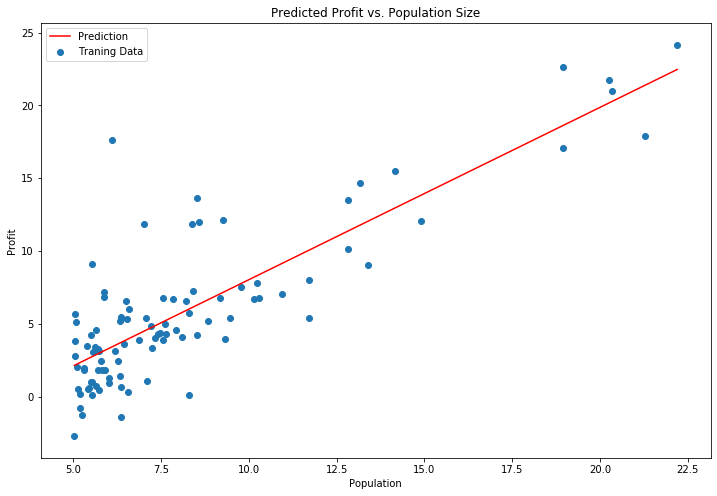

In [21]:
fig, ax = plt.subplots(figsize=(12,8))

x = np.linspace(data.Population.min(), data.Population.max(),100) # x自变量
f = bestTheta[0][0] + bestTheta[1][0] * x # f因变量（假设函数）

ax.plot(x,f,'r', label='Prediction')

ax.scatter(data.Population, data.Profit, label="Traning Data")

ax.legend(loc=2)

ax.set(xlabel='Population',ylabel='Profit', title='Predicted Profit vs. Population Size')

plt.show()

## 4. 绘制”迭代次数-代价函数“曲线

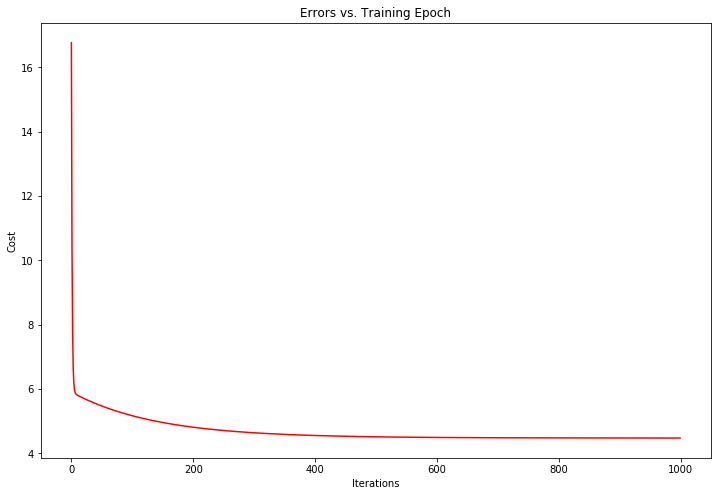

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), costs, 'r')

# ax.set_xlabel('Iterations')
# ax.set_ylabel('Cost')
# ax.set_title('Errors vs. Training Epoch')

ax.set(xlabel='Iterations',ylabel='Cost', title='Errors vs. Training Epoch')

plt.show()

## 5. 绘制$J(\theta)$三维函数图和$J(\theta)$等高线

画出代价函数J与theta_0和theta_1的函数关系图

In [23]:
from mpl_toolkits.mplot3d import Axes3D

In [24]:
# Viusalizing J(theta_0, theta_1)
theta0_vals = np.linspace(-10, 10,100)
theta1_vals = np.linspace(-1, 4,100)

n1 = len(theta0_vals)
n2 = len(theta1_vals)
J_vals = np.zeros((n1, n2))

for i in range(n1):
    for j in range(n2):
        t = np.vstack((theta0_vals[i], theta1_vals[j])) # vstack按照竖的方向堆叠起来
        J_vals[i, j] = costFunction(X, y ,t)

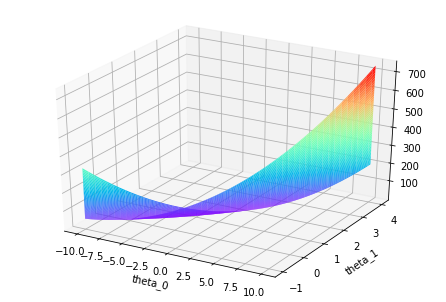

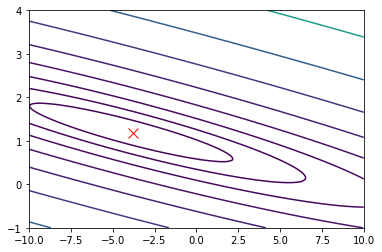

In [25]:
# 绘制J(theta)的函数图像
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap = 'rainbow')
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.show()

# 绘制等高线图
plt.contour(theta0_vals,theta1_vals, J_vals.T, levels = np.logspace(-2,3,20))
plt.plot(bestTheta[0], bestTheta[1], 'rx', markersize = 10, linewidth = 2) # 标注处表示J取到最小值
plt.show()

# 二、多变量线性回归

练习1还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [26]:
path2 = 'ex1data2.txt'
data2 = pd.read_csv(path2, header=None, names=['size', 'Bedrooms', 'Price'])
data2.head()

,size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 1. 特征归一化
多特征时，最好先进行归一化，而这在pandas中是非常简单的

In [27]:
# 对于回归问题，标签y最好也归一化，因为我们归一化只是用来求最好的参数的，然后给一个新的数据（未归一化），得到的y
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## 2. 处理数据

In [28]:
data2.insert(0, 'x0', 1)

In [29]:
cols2 = data2.shape[1]
X2 = data2.iloc[:,0:cols2-1]
y2 = data2.iloc[:,cols2-1]

# X2同名，所以不要多次执行这个单元块
X2 = X2.values # pandas Dataframes 转为 numpy
y2 = y2.values

y2 = y2.reshape(data2.shape[0],1)

In [30]:
X2.shape, y2.shape

((47, 3), (47, 1))

In [31]:
theta = np.zeros((data2.shape[1] - 1, 1))
theta.shape

(3, 1)

## 3. 梯度下降函数拟合参数
多特征时，最好先进行归一化，而这在pandas中是非常简单的

In [32]:
bestTheta, cost2 = gradientDescent(X2,y2,theta,alpha,iters)

In [33]:
# 训练出来的最佳参数
bestTheta

array([[-1.10396326e-16],
       [ 8.84683917e-01],
       [-5.30967489e-02]])

## 4. 绘制迭代曲线

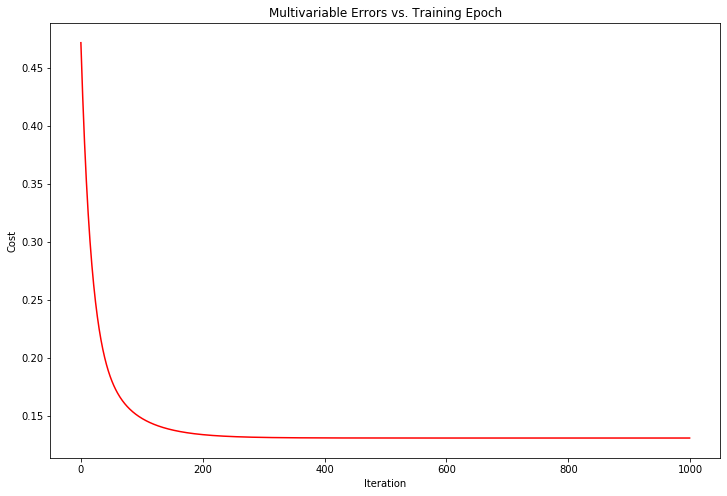

In [34]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')

# ax.set_xlabel('Iterations')
# ax.set_ylabel('Cost')
# ax.set_title('Errors vs. Training Epoch')

ax.set(xlabel='Iteration',ylabel='Cost', title='Multivariable Errors vs. Training Epoch')

plt.show()

In [35]:
# 预测一个未知数据的y
predict_y = bestTheta.T@(np.array([1,0.3,4]).reshape(3,1))
predict_y[0][0]

0.05301817942195533

## 5. 比较不同学习率alpha的曲线图

In [36]:
candidate_alpha=[0.0001,0.0003, 0.001,0.003,0.01, 0.03, 0.1]
iters = 2000

[Text(0, 0.5, 'cost'), Text(0.5, 0, 'iters'), Text(0.5, 1.0, 'cost vs. iters')]

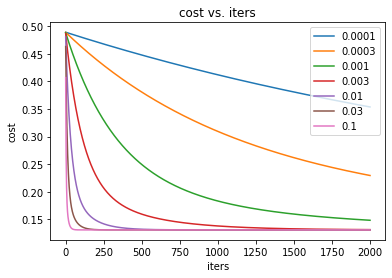

In [37]:
fig,ax = plt.subplots()

for alpha in candidate_alpha:
    g,costs = gradientDescent(X2,y2,theta,alpha, iters)
    ax.plot(np.arange(iters), costs, label=alpha)
    ax.legend()
    
ax.set(xlabel='iters', ylabel='cost',title='cost vs. iters')

# 三、Sklearn实现线性回归
我们可以使scikit-learn中的线性回归函数，而不是从头开始实现这些算法

这里我用的是单变量线性回归的数据

In [38]:
from sklearn import linear_model
# 1.构建分类器
model = linear_model.LinearRegression()
# 2.训练模型，得出数据的规律
model.fit(X,y)
# 3.使用训练好的分类器预测新数据
f = model.predict(X)

In [39]:
x = np.array(X[:,1])
x

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

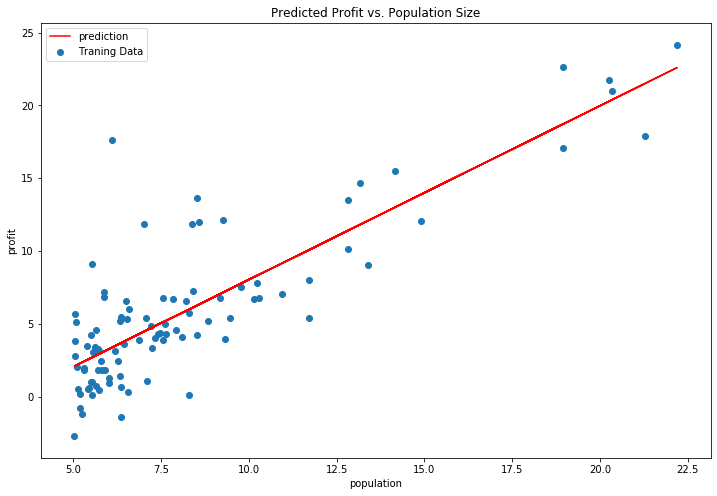

In [40]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='prediction') # 用分类器预测训练集的结果
ax.scatter(data.Population,data.Profit,label='Traning Data')
ax.legend(loc=2)

ax.set(xlabel='population', ylabel='profit',title='Predicted Profit vs. Population Size')

plt.show()


# 四、Normal Equation（正规方程）
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [41]:
# 正规方程
def normalEqn(X,y):
    theta = np.linalg.pinv(X.T@X)@X.T@y
    return theta

In [42]:
# 使用多变量线性回归的数据
final_theta2=normalEqn(X2,y2) # 和使用批量梯度下降的theta差不多
final_theta2

array([[ 5.55111512e-17],
       [ 8.84765988e-01],
       [-5.31788197e-02]])